# Midterm
Machine Learning for the Social Sciences
Prof. Michael Parrot
29 October 2021
Yun Choi

In [39]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Import the spam dataset and print the first six rows.

In [57]:
# Import spam dataset
raw_spam_data=pd.read_csv("/Volumes/Yun Choi/columbia_university/coursework/GR5073/midterm/spam_dataset.csv")
# Print first six rows
raw_spam_data.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 2.  Read through the documentation of the original dataset here: http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise. Which three variables in the dataset do you think will be important predictors in a model of spam? Why?


In [41]:
# Print all column names
raw_spam_data.columns

Index(['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       '

I think 'word_feq_free:', 'word_freq_project:', and 'capital_run_length' are among the most important predictors.

1. 'word_freq_free:': Percentage of the word 'free' out of all words in an email
2. 'word_freq_project:': Percentage of the word 'project' out of all words in an email
3. 'capital_run_length_average:': Average length of uninterrupted sequences of capital letters

First, I think 'word_freq_free' is important because many unsolicited commercial emails claim that their customers will get a great deal by getting 'free' extra goods or services. Second, I think 'word_freq_project:' is important because the absence of the word 'project' could well predict whether the email is spam, as the word is often used in daily life but rarely used in a commercial setting. Third, I think 'capital_run_length_average:' is important because many unsolicited emails employ various strategies to grab the readers' attention, and the overuse of capital letters is among them.

## 3.  Visualize the univariate distribution of each of the variables in the previous question.

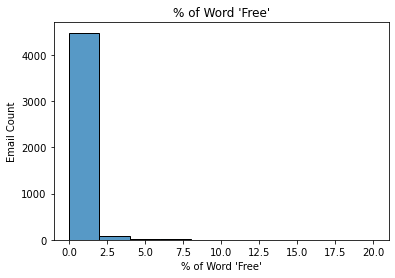

In [42]:
# Create a histogram of potential explanatory variable #1: 'word_freq_free:'
sns.histplot(raw_spam_data['word_freq_free:'], binwidth=2)
plt.title("% of Word 'Free'")
plt.ylabel("Email Count")
plt.xlabel("% of Word 'Free'");

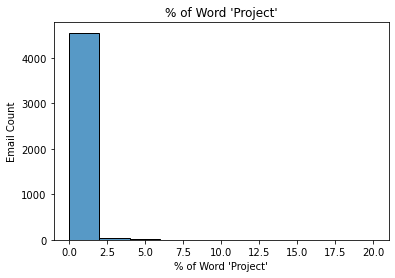

In [43]:
# Create a histogram of potential explanatory variable #2: 'word_freq_project:'
sns.histplot(raw_spam_data['word_freq_project:'], binwidth=2)
plt.title("% of Word 'Project'")
plt.ylabel("Email Count")
plt.xlabel("% of Word 'Project'");

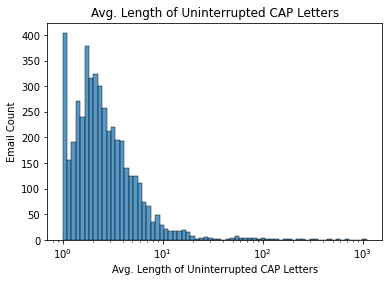

In [44]:
# Create a histogram of potential explanatory variable #3: 'capital_run_length_average:'
sns.histplot(raw_spam_data['capital_run_length_average:'], log_scale=True)
plt.title("Avg. Length of Uninterrupted CAP Letters")
plt.ylabel("Email Count")
plt.xlabel("Avg. Length of Uninterrupted CAP Letters");

## 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".
This project is building a spam classifier with continuous explanatory features. Among the algorithms we have learned so far, ones that can perform classification with continuous explanatory features are KNeighbors Classifier, (penalized and non-penalized) Logistic Regression, SVM, Decision Tree, Bagged Tree, and Random Forest.

## 5. Describe the importance of training and test data. Why do we separate data into these subsets?
Machine learning models are primarily for prediction. After building a model, we would want to assess each model's performance before using it. We can do so by giving unforeseen data and seeing how accurate its prediction is. If we use the whole dataset to train the model, there would be no unforeseen data left to test the model's prediction performance. Testing the model based on a portion of the dataset that was used to build it will not yield an accurate assessment of the model, as the model remembers the data. Therefore, it is crucial to split the whole dataset into training and test data before building the model.

## 6. What is k-fold cross validation and what do we use it for?
K-fold cross-validation partitions the whole dataset into k parts of equal size, and trains a series of models based on k different training and test set pairs. For example, if you perform 5-fold cross-validation, the whole dataset will be split into five parts, and the first part will be used to test the first version. And then, the second part will be used to test the second version, and so on.

K-fold is one of the cross-validation strategies developed to evaluate a machine learning model more stably through resampling. A model is built with train data, so it is sensitive to how you split the data. K-fold cross-validation allows a more thorough model evaluation by training a k-series of models with k different splits of the whole dataset.

## 7. How is k-fold cross validation different from stratified k-fold cross validation?
Simple k-fold cross-validation splits the whole data into k folds starting with the first one-k-th part of the data. If observations are in a random order, simple k-fold cross-validation works. But if observations are ordered by a certain value such that the leading, middle, and tailing parts of the dataset differ vastly, k-fold cross validation will not be useful. That's when stratified k-fold gets useful. Stratified k-fold splits the data into k parts such that the composition of each part is representative of the whole dataset.

## 8-11. Choose one model from question four. Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous model?
For Question 8-11, I build, tune, and compare cross-validation and test scores for four models at once.

In [58]:
# Separate X and y data
y = raw_spam_data['spam']
# Choose only three variables of my interest
X = raw_spam_data.loc[:, ['word_freq_free:', 'word_freq_project:', 'capital_run_length_average:']]

print(y[0:5])
X.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


,word_freq_free:,word_freq_project:,capital_run_length_average:
0,0.32,0.0,3.756
1,0.14,0.0,5.114
2,0.06,0.0,9.821
3,0.31,0.0,3.537
4,0.31,0.0,3.537


In [46]:
# Split data into training and test subsets
from sklearn.model_selection import train_test_split

# Split data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import models to compare and functions to use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [47]:
# Set default models to compare
knn_classifier = KNeighborsClassifier()
logistic_regression = LogisticRegression(penalty = 'none', solver = 'newton-cg', max_iter = 100000, tol=0.1, random_state = 42)
support_vector_classifier_linear = SVC(kernel='linear', random_state=42)
support_vector_classifier_rbf = SVC(kernel='rbf', random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)

In [48]:
# Set up cross validation strategies
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
# Standardize data with StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Create a geometric progression to feed in as alphas and Cs
a = 0.0001
r = 10
length = 8
alpha_C_geometric = [a * r ** (n - 1) for n in range(1, length + 1)]
alpha_C_geometric

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [51]:
# models to compare
models_for_gridsearch = {
    'KNeighborsClassifier': knn_classifier,
    'LogisticRegression': logistic_regression,
    'SupportVectorClassifier_Linear': support_vector_classifier_linear,
    'SupportVectorClassifier_RBF': support_vector_classifier_rbf,
    'RandomForestClassifier': random_forest_classifier
}

# optimisation hyperparameters for each of the above models
params_for_gridsearch = {
    'KNeighborsClassifier':{
        'n_neighbors': np.arange(1, 15, 2),
        'weights': ['uniform', 'distance']
    },
    'LogisticRegression':{
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
    },
    'SupportVectorClassifier_Linear':{
        'C': alpha_C_geometric,
    },
    'SupportVectorClassifier_RBF':{
        'C': alpha_C_geometric,
        'gamma': alpha_C_geometric
    },
    'RandomForestClassifier':{
        'n_estimators': [100, 150, 200],
        'max_depth': [5, 8, 10],
        'max_features': [1, 2, 3]
    }
}

def model_compare(X_train_scaled, y_train):
    for name in models_for_gridsearch.keys():
        est = models_for_gridsearch[name]
        est_params = params_for_gridsearch[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=kfold)
        gscv.fit(X_train_scaled, y_train)
        print("")
        print("Original Model:", est)
        print("  original test-set score: {:.3f}".format(est.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)))
        print(" Tuning Parameters: {}".format(gscv.best_params_))
        print("   best mean cross-validation score: {:.3f}".format(gscv.best_score_))
        print("   test-set score: {:.3f}".format(gscv.score(X_test_scaled, y_test)))

In [52]:
model_compare(X_train_scaled, y_train)


Original Model: KNeighborsClassifier()
  original test-set score: 0.798
 Tuning Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
   best mean cross-validation score: 0.809
   test-set score: 0.797

Original Model: LogisticRegression(max_iter=100000, penalty='none', random_state=42,
                   solver='newton-cg', tol=0.1)
  original test-set score: 0.751
 Tuning Parameters: {'solver': 'newton-cg'}
   best mean cross-validation score: 0.772
   test-set score: 0.751

Original Model: SVC(kernel='linear', random_state=42)
  original test-set score: 0.756
 Tuning Parameters: {'C': 10.0}
   best mean cross-validation score: 0.781
   test-set score: 0.758

Original Model: SVC(random_state=42)
  original test-set score: 0.779
 Tuning Parameters: {'C': 10.0, 'gamma': 100.0}
   best mean cross-validation score: 0.808
   test-set score: 0.776

Original Model: RandomForestClassifier(random_state=42)
  original test-set score: 0.788
 Tuning Parameters: {'max_depth': 8, 'max_features': 1

The result above shows (1) original model parameters, (2) original test score, (3) my best parameters for tuning, (4) mean cross-validation score after tuning, and (5) test-set score after tuning, for four models below.

**MODEL 1: KNeighbor Classifier**
- Tuning parameters: {'n_neighbors': 7, 'weights': 'uniform'}
- I change 'n_neighbors' to '7' so that the model uses the seven nearest neighbors and weighting them equally for prediction. I select these parameters after trying every odd number between 1 and 15 for 'n_neighbors' and 'weights' options with GridSearchCV, which in turn has found this combination of 'n_neighbor' and 'weights' values yields the best prediction performance.

**MODEL 2: Logistic Regression**
Logistic regression has no parameter to tune. I tried different solvers with GridSearchCV, but my original solver - newton-cg - has turned out to be the best one.

**MODEL 3: Support Vector Classfier**
- Tuning parameters: {kernel: 'rbf', 'C': 10.0, 'gamma': 100.0}
- I have tried 'linear' and 'rbf' kernels, and a series of powers of 10 for C and gamma with GridSearchCV. Subsequently, I have learned choosing 'rbf' kernel and '10' and '100' for the C and gamma values, respectively, brings out the best result. The best test score I could get with the linear kernel was 0.758. Switching to the rbf kernel has improved the test score to 0.776.

**MODEL 4: Random Forest Classifier**
- Tuning parameters: {'max_depth': 8, 'max_features': 1, 'n_estimators': 200}
- I change the maximum depth of the tree, the number of features to consider, and the number of trees in the forest, to '8', '1', and '200', respectively, as I have learned that this particular combination of parameters improve the test-set score from 0.788 to 0.804.

My best models are Random Forest Classifier, KNeighbor Classifier, SVC, and Logistic Regression in that order because their test scores are high in that order.

## 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy. Did this model predict test data better than your previous models?
## 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model. Why did you select this model among all of the models that you ran?
Like above, for Question 12-13, I compare all four models with the best parameters at once with the codes below.

I added 'word_freq_order:', 'word_freq_credit:', and 'word_freq_meeting:' variables to the X data.

In [53]:
# Save best parameters for each model
best_knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
best_lr = LogisticRegression(max_iter=100000, penalty='none', random_state=42,
                           solver='newton-cg', tol=0.1)
best_svc = SVC(kernel='rbf', C=10, gamma=100, random_state=42)
best_rf = RandomForestClassifier(max_depth=8, max_features=1, n_estimators=200, random_state=42)

In [54]:
# Add three more variables - 'word_freq_order:', 'word_freq_credit:', 'word_freq_meeting:' - to X data
# Separate X and y data
new_y = raw_spam_data['spam']
# Choose only three variables of my interest
new_X = raw_spam_data.loc[:, ['word_freq_free:', 'word_freq_project:', 'capital_run_length_average:',
                          'word_freq_order:', 'word_freq_credit:', 'word_freq_meeting:']]

print(new_y[0:5])
new_X.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


,word_freq_free:,word_freq_project:,capital_run_length_average:,word_freq_order:,word_freq_credit:,word_freq_meeting:
0,0.32,0.0,3.756,0.00,0.00,0.0
1,0.14,0.0,5.114,0.00,0.00,0.0
2,0.06,0.0,9.821,0.64,0.32,0.0
3,0.31,0.0,3.537,0.31,0.00,0.0
4,0.31,0.0,3.537,0.31,0.00,0.0


In [55]:
# Split new data in training and test sets
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, random_state=42)

# Standardize new data with StandardScaler()
scaler = StandardScaler()
scaler.fit(new_X_train)
new_X_train_scaled = scaler.transform(new_X_train)
new_X_test_scaled = scaler.transform(new_X_test)

In [56]:
# Re-compare models with standardized data
best_models = [best_rf, best_knn, best_svc, best_lr]
for i in best_models:
    print("")
    print("Model:", i)
    print("  previous test-set score: {:.3f}".format(i.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)))
    print("  new test-set score: {:.3f}".format(i.fit(new_X_train_scaled, new_y_train).score(new_X_test_scaled, new_y_test)))


Model: RandomForestClassifier(max_depth=8, max_features=1, n_estimators=200,
                       random_state=42)
  previous test-set score: 0.804
  new test-set score: 0.818

Model: KNeighborsClassifier(n_neighbors=7)
  previous test-set score: 0.797
  new test-set score: 0.820

Model: SVC(C=10, gamma=100, random_state=42)
  previous test-set score: 0.776
  new test-set score: 0.795

Model: LogisticRegression(max_iter=100000, penalty='none', random_state=42,
                   solver='newton-cg', tol=0.1)
  previous test-set score: 0.751
  new test-set score: 0.778


The result above shows how adding the three new variables has changed the test-set score of the four models.

Adding the three new variables improved each model's prediction accuracy, although the magnitude of improvement varies by model. LogisticRegression and KNeighborsClassifier have seen a greater improvement than SVC and RandomForestClassifier. Now KNeighbors Classifier has a higher test score than my previous best model Random Forest Classifier. For that reason, I will choose KNeighbors Classifier as my final best model.

From this exercise, I have learned that simply adding new variables to X data, without tuning parameters again based on the updated data, can improve model performance.

## 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.
I think the total number of emojis used in the mail would be a great predictor for spam. I went into my spam mailbox to answer this question, and found that many unsolicited commercial emails I have received have emojis, which I can never see from my correspondence with someone I know. Therefore, how many emojis are used in an email could be a great predictor.

## 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam. List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.
Except for (penalized and non-penalized) Logistic Regression, all algorithms we have learned thus far can be used as a regressor. Those include KNeighbors Regressor, Linear Regression, Ridge, Lasso, SVM, Decision Tree, Bagged Tree, and Random Forest Regressor. However, many of these algorithms require continuous explanatory variables. Therefore, when choosing a model, we should also care whether explanatory variables are continuous.